In [11]:
# !pip install nuscenes-devkit==1.1.9 &> /dev/null  # Install nuScenes.

In [30]:
%matplotlib inline
from nuscenes.nuscenes import NuScenes

nusc = NuScenes(version="v1.0-eval", dataroot="./data/nuscenes_eval" , verbose=True)

Loading NuScenes tables for version v1.0-eval...
0 category,
0 attribute,
0 visibility,
0 instance,
12 sensor,
12 calibrated_sensor,
1 ego_pose,
1 log,
1 scene,
41 sample,
11545 sample_data,
0 sample_annotation,
1 map,
Done loading in 0.023 seconds.
Reverse indexing ...
Done reverse indexing in 0.0 seconds.


In [31]:
#データセット内に含まれる全シーンの一覧を取得する
nusc.list_scenes()

scene_1, Evaluation scene [70-01-01 00:00:06]   20s, eval, #anns:0


{'token': 'aa128f67-cf1b-4b18-bf94-7bc9a391f596', 'name': 'scene_1', 'description': 'Evaluation scene', 'log_token': '05169e42-61b4-42ad-9de0-7dd2a53e6b46', 'nbr_samples': 41, 'first_sample_token': 'ac9c28c7-0d57-474c-a0bc-a3176629de45', 'last_sample_token': '593525bf-0e0e-4aa7-94b4-beb49b671da7'}
ac9c28c7-0d57-474c-a0bc-a3176629de45


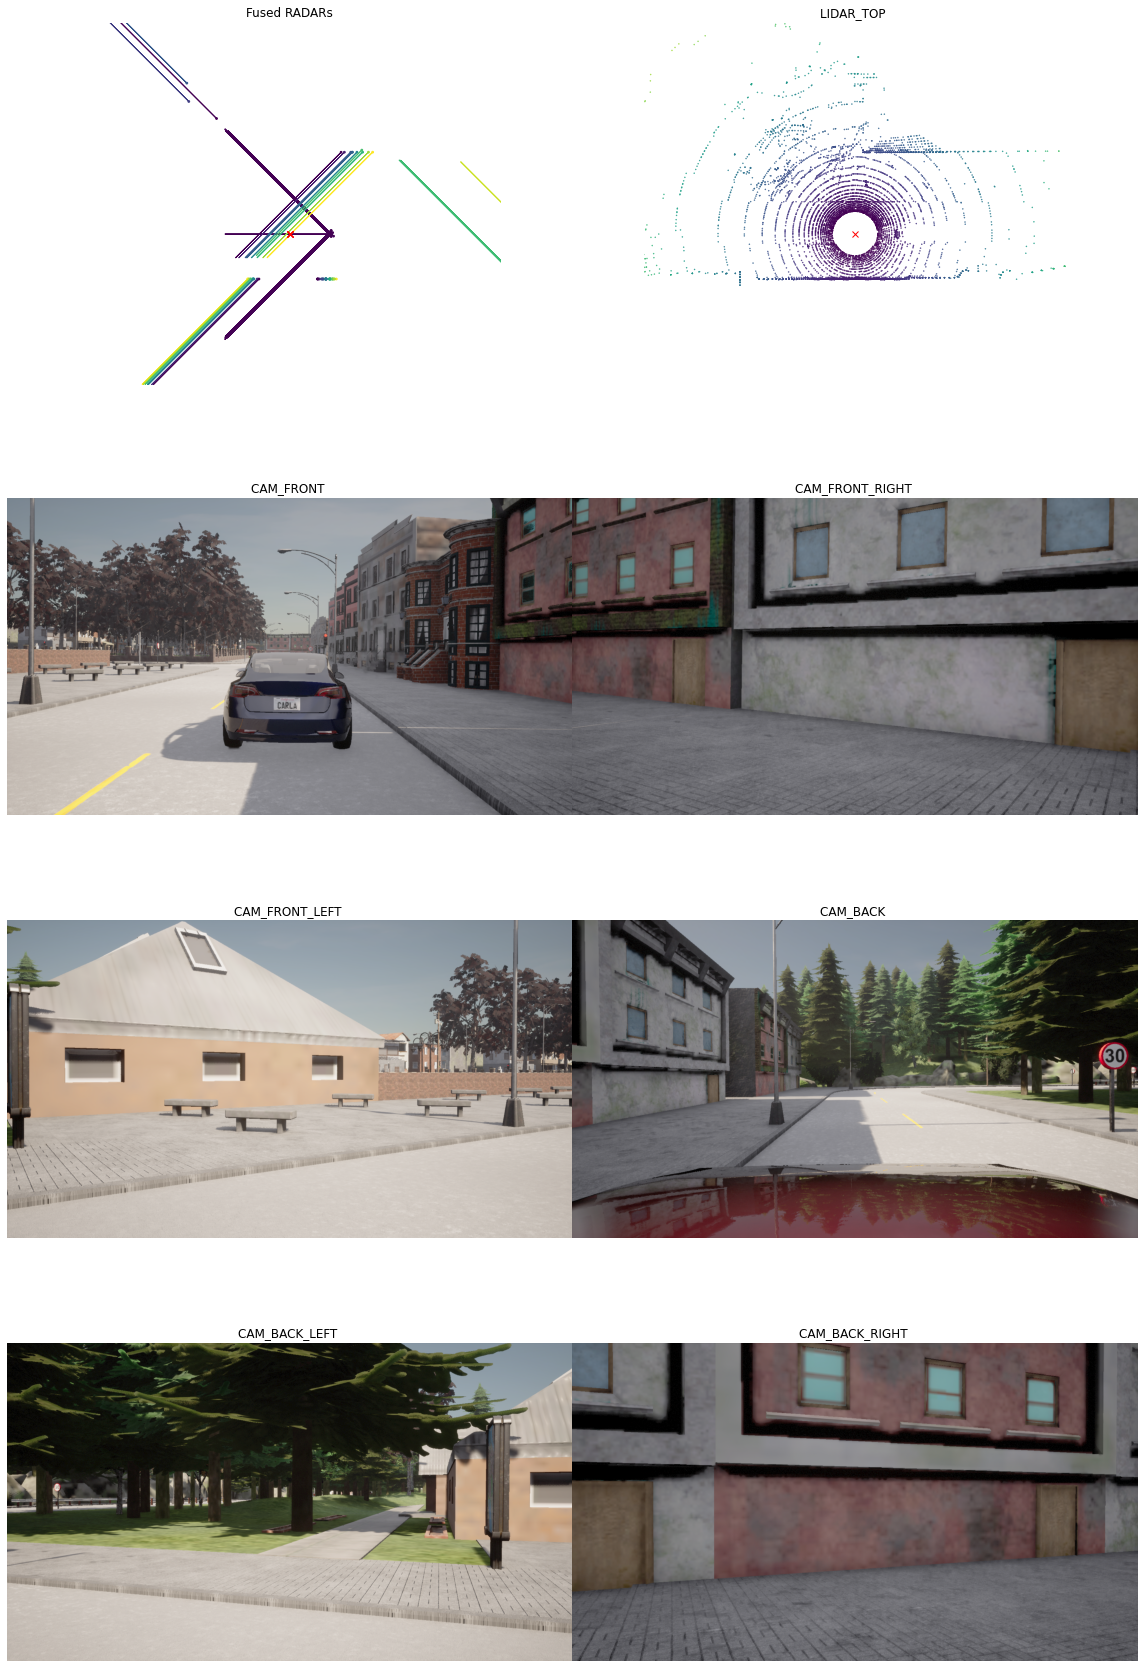

In [32]:
# 最初のシーンを取得
scene = nusc.scene[0]
print(scene)

# 最初の sample_token を取得
first_sample_token = scene['first_sample_token']
print(first_sample_token)
from nuscenes.utils.data_classes import RadarPointCloud
# RadarPointCloud.disable_filters()   # これで ambig_state や dynprop のフィルタを全部OFF

# sample を可視化（画像 or LiDAR にバウンディングボックス付き）
nusc.render_sample(first_sample_token)


In [33]:
my_sample = nusc.get('sample', first_sample_token)
print(my_sample)

{'token': 'ac9c28c7-0d57-474c-a0bc-a3176629de45', 'scene_token': 'aa128f67-cf1b-4b18-bf94-7bc9a391f596', 'prev': '', 'next': 'ee3f356e-e6e8-403b-b9bf-7f325bb89284', 'timestamp': 6595330, 'data': {'CAM_FRONT': '45616cf8-d39b-45b6-bcf1-18406e3cbe8e', 'CAM_FRONT_RIGHT': 'c6f61dd2-25e4-49d3-af14-f47c73daab9e', 'CAM_FRONT_LEFT': '054bb5de-0393-4314-9b16-54bdedb68d05', 'CAM_BACK': '1a7e06e8-add5-4472-b0f7-e1d514e6e369', 'CAM_BACK_LEFT': '3fde38a1-0f45-476b-b156-78d414ade7d6', 'CAM_BACK_RIGHT': 'a214f55e-503d-4fef-ae72-cf474cddbd44', 'RADAR_FRONT': '54d2cabd-3966-4845-9a15-7a05717841f5', 'RADAR_FRONT_LEFT': 'c2e31e29-ee98-4692-b447-c495c8228674', 'RADAR_FRONT_RIGHT': '31e8d076-4758-453a-9acb-273bbeeb342b', 'RADAR_BACK_LEFT': 'c6ed1dde-4fe0-4a92-9cbc-dfffc19cf6c8', 'RADAR_BACK_RIGHT': 'e4572ecc-ab96-4065-84ab-37ddcef070af', 'LIDAR_TOP': 'd8ab4a72-3568-4d22-a858-ca4fb5f59326'}, 'anns': []}


In [34]:
# 指定した サンプル（1フレーム） に含まれる 全てのセンサーデータ（sample_data） を一覧表示する
# どのセンサで撮像されたものか、どういったアノテーション情報が含まれているか
nusc.list_sample(my_sample['token'])

Sample: ac9c28c7-0d57-474c-a0bc-a3176629de45

sample_data_token: 45616cf8-d39b-45b6-bcf1-18406e3cbe8e, mod: camera, channel: CAM_FRONT
sample_data_token: c6f61dd2-25e4-49d3-af14-f47c73daab9e, mod: camera, channel: CAM_FRONT_RIGHT
sample_data_token: 054bb5de-0393-4314-9b16-54bdedb68d05, mod: camera, channel: CAM_FRONT_LEFT
sample_data_token: 1a7e06e8-add5-4472-b0f7-e1d514e6e369, mod: camera, channel: CAM_BACK
sample_data_token: 3fde38a1-0f45-476b-b156-78d414ade7d6, mod: camera, channel: CAM_BACK_LEFT
sample_data_token: a214f55e-503d-4fef-ae72-cf474cddbd44, mod: camera, channel: CAM_BACK_RIGHT
sample_data_token: 54d2cabd-3966-4845-9a15-7a05717841f5, mod: radar, channel: RADAR_FRONT
sample_data_token: c2e31e29-ee98-4692-b447-c495c8228674, mod: radar, channel: RADAR_FRONT_LEFT
sample_data_token: 31e8d076-4758-453a-9acb-273bbeeb342b, mod: radar, channel: RADAR_FRONT_RIGHT
sample_data_token: c6ed1dde-4fe0-4a92-9cbc-dfffc19cf6c8, mod: radar, channel: RADAR_BACK_LEFT
sample_data_token: e4572ec

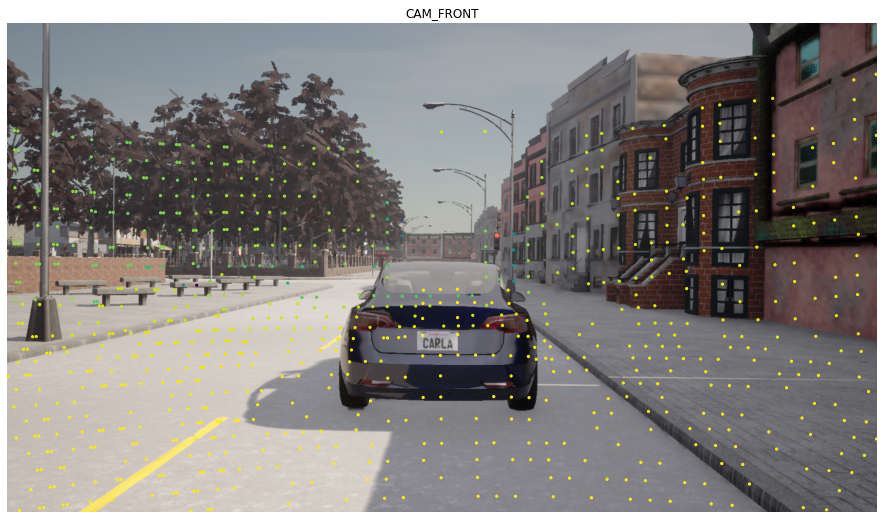

In [35]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(16, 9))
nusc.explorer.render_pointcloud_in_image(
    my_sample['token'],
    pointsensor_channel='LIDAR_TOP',
    camera_channel='CAM_FRONT',     # 必要なら別CAMに
    render_intensity=True,
    ax=ax                           # ここで渡す
)
plt.show()
